In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class slotMachine():
    def __init__(self, p):
        self.p = p
        
    def optimisticInitial(self):
        self.mu = [5.]
        self.N = 1
        
    def ThampsonSampling(self):
        self.a = 1
        self.b = 1
        self.mu = [0.]
        self.N = 0
        
    def pureGreedy(self):
        self.mu = [0.]
        self.N = 0
        
    def play(self):
        res = np.random.random() < self.p
        self.N += 1
        self.mu.append( ((self.N-1)*self.mu[-1] + res) / self.N)
    
    def plot(self):
        if len(self.mu) <= 1 :
            print('This machine is not played')
            return
        plt.title('Explore - Exploite Convergence')
        plt.ylabel('Probablity')
        plt.xlabel('Exploration')
        plt.axhline(self.p, color = 'red', xmin = 0.03, xmax = 0.97)
        plt.plot(self.mu, label = 'Explored Probability')
        plt.show()

In [14]:
class Player():
    def play(self, machines, upperRange, lowerRange = 0, algo = 'vanilla'):
        for n in range(lowerRange, upperRange):
            
            if algo == 'vanilla':
                mu_hat = [m.mu[-1] for m in machines]
                                             
            else:
                if algo == 'ucb1':
                    mu_hat = [m.mu[-1] + ( 2*np.log(n) / m.N )**0.5 for m in machines]
                if algo == 'thompson':
                    mu_hat = [np.random.beta(m.a, m.b) for m in machines]
               
            i = np.argmax(np.array(mu_hat))
            machines[i].play()
            machines[i].a, machines[i].b = machines[i].a + 1, machines[i].b + 1
            
    def plot(self, machines):
        for m in machines:
            m.plot()

# Playing machines independently

In [218]:
mac = slotMachine(0.6)
mac2 = slotMachine(0.7)
mac3 = slotMachine(0.3)

In [212]:
mac.pureGreedy()
mac2.pureGreedy()
mac3.pureGreedy()

In [213]:
mac.mu

[0.0]

In [188]:
for i in range(200):
    mac.play()
    mac2.play()
    mac3.play()

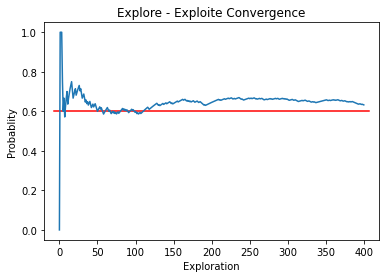

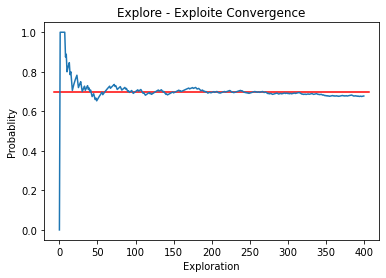

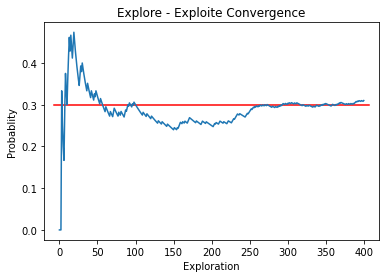

In [189]:
mac.plot()
mac2.plot()
mac3.plot()

# Playing machines dependent to their sampled average

### Pure Greedy Approach

In [228]:
player1 = Player()

mac = slotMachine(0.6)
mac2 = slotMachine(0.7)
mac3 = slotMachine(0.3)

mac.pureGreedy()
mac2.pureGreedy()
mac3.pureGreedy()

machines = [mac, mac2, mac3]

In [225]:
player1.play(machines, 1000)

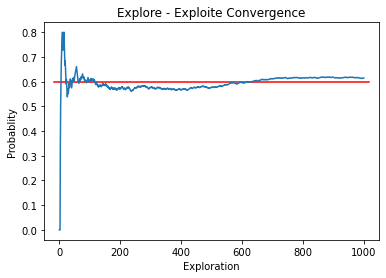

This machine is not played
This machine is not played


In [226]:
player1.plot(machines)

### Optimistic Initial Value Approach

In [229]:
player2 = Player()

mac = slotMachine(0.6)
mac2 = slotMachine(0.7)
mac3 = slotMachine(0.3)

mac.optimisticInitial()
mac2.optimisticInitial()
mac3.optimisticInitial()

machines = [mac, mac2, mac3]

In [230]:
player2.play(machines, 1000)

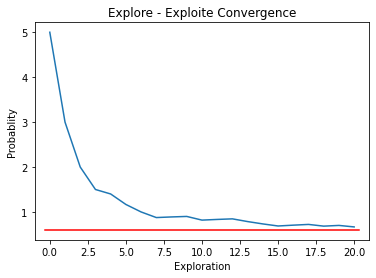

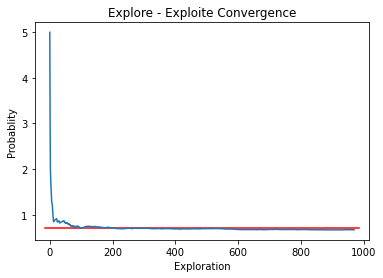

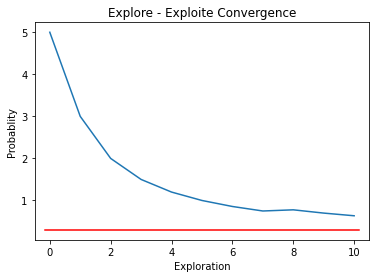

In [231]:
player2.plot(machines)

In [252]:
player3 = Player()

mac = slotMachine(0.6)
mac2 = slotMachine(0.7)
mac3 = slotMachine(0.3)

mac.pureGreedy()
mac2.pureGreedy()
mac3.pureGreedy()

machines = [mac, mac2, mac3]

In [248]:
player3.play(machines, 1000, algo = 'ucb1')

C:\Users\OMUR~1.GUL\AppData\Local\Temp/ipykernel_28164/23144630.py:6: RuntimeWarning: divide by zero encountered in log
  mu_hat = [m.mu[-1] + ( 2*np.log(n) / m.N )**0.5 for m in machines]
C:\Users\OMUR~1.GUL\AppData\Local\Temp/ipykernel_28164/23144630.py:6: RuntimeWarning: invalid value encountered in double_scalars
  mu_hat = [m.mu[-1] + ( 2*np.log(n) / m.N )**0.5 for m in machines]
C:\Users\OMUR~1.GUL\AppData\Local\Temp/ipykernel_28164/23144630.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  mu_hat = [m.mu[-1] + ( 2*np.log(n) / m.N )**0.5 for m in machines]


In [253]:
#in order to bypass zero division error we force player to play with each machine at least 1 time 
for m in machines:
    m.play()
player3.play(machines, 1000, 3, algo = 'ucb1')

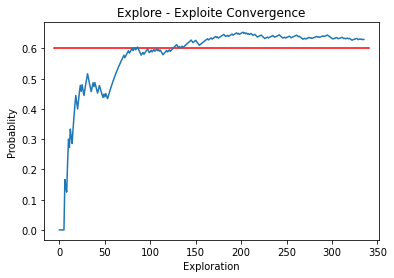

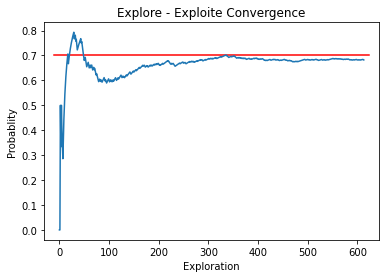

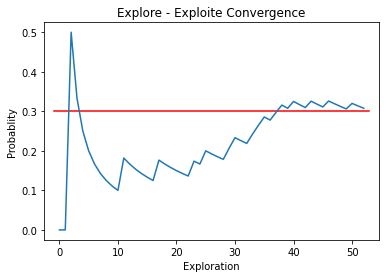

In [254]:
player3.plot(machines)

### Thompson Sampling - Beta Distribution

In [15]:
player4 = Player()

mac = slotMachine(0.6)
mac2 = slotMachine(0.7)
mac3 = slotMachine(0.3)

mac.ThampsonSampling()
mac2.ThampsonSampling()
mac3.ThampsonSampling()

machines = [mac, mac2, mac3]

In [16]:
player4.play(machines, 1000, algo = 'thompson')

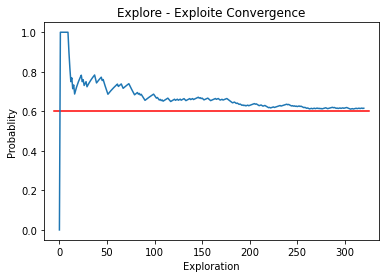

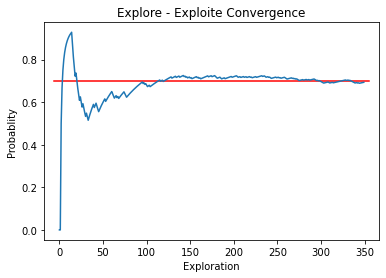

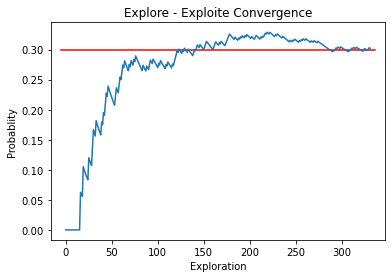

In [17]:
player4.plot(machines)